# Prepare the data

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape
X_train, X_test, y_train, y_test = X[:50000], X[50000:], y[:50000], y[50000:]
shuffle_index = np.random.permutation(50000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# The data is prepared

1 Estimate MNIST SGDClassifier to distinguish digit 3 from other digits. Report average precision rate when the recall = 86.1% (you can round up the recall value up to the 3rd digit). Use cv = 3. Draw first 50,000 observations for training dataset and shuffle the data. Use random_state = 42.

In [4]:
import numpy as np
X_train, X_test, y_train, y_test = X[:50000], X[50000:], y[:50000], y[50000:]
shuffle_index = np.random.permutation(50000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=3, random_state=42)
sgd_clf.fit(X_train, y_train_3)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

array([[42214,  1655],
       [ 1128,  5003]])

In [5]:
y_scores = sgd_clf.decision_function(X_train)
y_scores

array([ -609441.06146406,  -824086.39024107,  -104442.68399136, ...,
       -1118509.26721377,  -634482.41935384, -1082599.62542806])

In [6]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_3, y_train_pred)

0.8160169629750449

In [37]:
y_train_pred_14 = (y_scores > -42000) 

In [38]:
recall_score(y_train_3, y_train_pred_14)

0.8605447724677867

In [39]:
precision_score(y_train_3, y_train_pred_14)

0.8184920881166615

In [40]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
# Use if you see the error.
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

# Problem 2 
Plot Precision-recall curve for the fit statistics from the problem 1 bounding precision between 70% and 95%.

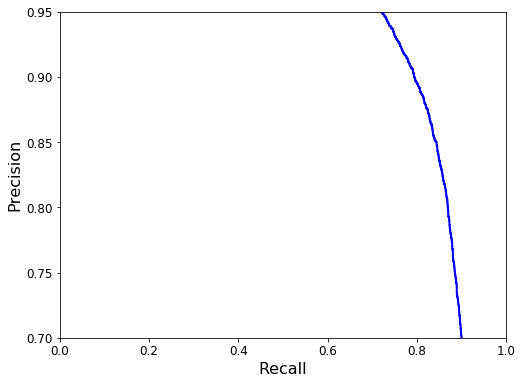

In [45]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0.7, 0.95])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# Problem 3 
What is the threshold that maximizes precision + recall from the previous problem? Report the threshold and maximum precision and recall.

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

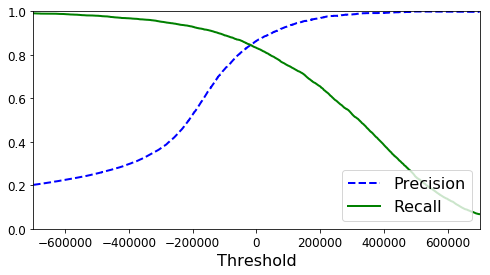

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

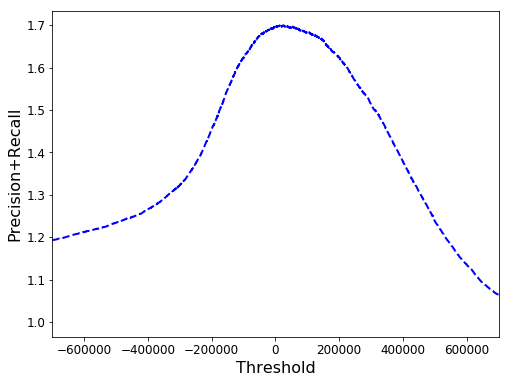

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)
def plot_maximum(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1]+recalls[:-1], "b--", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Precision+Recall", fontsize=16)

plt.figure(figsize=(8, 6))
plot_maximum(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [55]:
max(precisions+recalls) 

1.6995395096563677

In [108]:
y_train_pred_max = (y_scores > 8700)

In [109]:
recall_score(y_train_3, y_train_pred_max)

0.8262926113195237

In [110]:
precision_score(y_train_3, y_train_pred_max) # the thresholds is 8700

0.8719449225473321

In [111]:
f=recall_score(y_train_3, y_train_pred_max)+precision_score(y_train_3, y_train_pred_max)
f

1.6982375338668558

In [44]:
y1=list(precisions)
y2=list(recalls)
x=list(thresholds)
x.append(0) # make x has the same lenth as y1 and y2
for i in x:
    if y1==y2:
        print(i)

In [35]:
import pandas as np
re_1=np.DataFrame(recalls)
re_1.describe() #how to cumpute the equilibrium

,0
count,49085.000000
mean,0.910541
std,0.190858
min,0.000000
25%,0.936715
50%,0.981243
75%,0.995270
max,1.000000


In [16]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3,
                                    method="predict_proba")

In [17]:
from scipy import stats
stats.describe(y_probas_forest)

DescribeResult(nobs=50000, minmax=(array([0., 0.]), array([1., 1.])), mean=array([0.877574, 0.122426]), variance=array([0.07194551, 0.07194551]), skewness=array([-2.37113947,  2.37113947]), kurtosis=array([4.28448222, 4.28448222]))

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3,y_scores_forest)

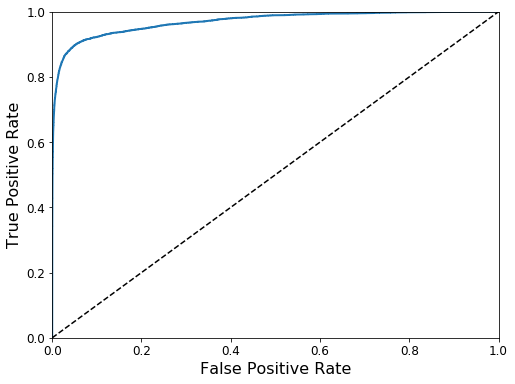

In [19]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

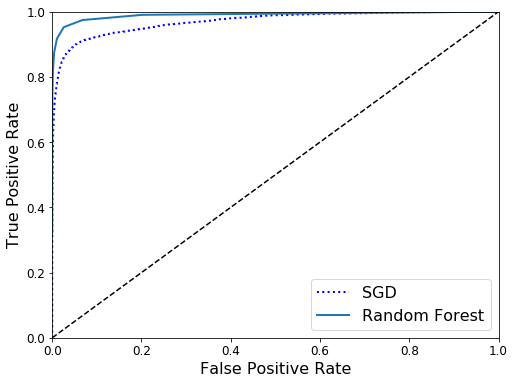

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Answer

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_scores)

roc_auc_score(y_train_3, y_scores_forest)
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3)
print(precision_score(y_train_3, y_train_pred_forest))
print(recall_score(y_train_3, y_train_pred_forest))

0.9862340216322517
0.8179742293263742


# Titanic

In [112]:
import os
os.chdir('..')
print(os.getcwd())

/Users/vannyzhang/Desktop


In [113]:
titanic = pd.read_csv('datasets/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [115]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The attributes have the following meaning:

Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
Pclass: passenger class.
Name, Sex, Age: self-explanatory
SibSp: how many siblings & spouses of the passenger aboard the Titanic.
Parch: how many children & parents of the passenger aboard the Titanic.
Ticket: ticket id
Fare: price paid (in pounds)
Cabin: passenger's cabin number
Embarked: where the passenger embarked the Titanic

# Problem 4
Build a pipeline to impute missing data for ["Age", "SibSp", "Parch", "Fare"]. Also impute missing categorical variables ["Pclass", "Sex", "Embarked"] and convert them into indicator variables. Merge the imputed variables with the rest of the data. Create vectors for training and testing data. Use "Survived" as a predictor and the rest of the variables as features. 

In [116]:
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head()
sample_incomplete_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [117]:
median = titanic[titanic.isnull().any(axis=1)].median()
sample_incomplete_rows.fillna(median, inplace=True) 
sample_incomplete_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [118]:
attributes = ["Age", "SibSp", "Parch", "Fare"]
t1=titanic[attributes]

In [119]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median") 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

t1_pipeline = Pipeline([('imputer', Imputer(strategy="median")),('std_scaler', StandardScaler()),])
t1_tr = t1_pipeline.fit_transform(t1)
t1_tr

array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [120]:
t2_tr = pd.DataFrame(t1_tr, columns=t1.columns,index = list(t1.index.values))

In [121]:
p1 = pd.get_dummies(titanic['Pclass'])
p1.columns=['0','1','2']
p2 = p1.idxmax(axis=1)

In [122]:
s1 = pd.get_dummies(titanic['Sex'])
s1.columns=['0','1']
s2 = s1.idxmax(axis=1)

In [123]:
e1 = pd.get_dummies(titanic['Embarked'])
e1.columns=['0','1','2']
e2 = e1.idxmax(axis=1)

In [124]:
cat =pd.concat([p2,s2,e2],axis=1)
cat.columns=['Pclass','Sex','Embarked']

In [125]:
imputer.fit(cat)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [126]:
X = imputer.transform(cat)

In [127]:
cat_tr = pd.DataFrame(X, columns=cat.columns,index = list(cat.index.values))
cat_tr.head()
type(cat_tr)

pandas.core.frame.DataFrame

In [128]:
r=['PassengerId']

In [129]:
data=pd.concat([t2_tr,cat_tr,titanic[r]],axis=1)
data.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,PassengerId
0,-0.565736,0.432793,-0.473674,-0.502445,2.0,1.0,2.0,1
1,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,0.0,2
2,-0.258337,-0.474545,-0.473674,-0.488854,2.0,0.0,2.0,3
3,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,2.0,4
4,0.433312,-0.474545,-0.473674,-0.486337,2.0,1.0,2.0,5


In [130]:
Y=titanic['Survived']

In [131]:
t2_pipeline = Pipeline([('imputer', Imputer(strategy="median")),('std_scaler', StandardScaler()),])
data0 = t2_pipeline.fit_transform(data)
data0

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.73769513,
         0.58937471, -1.73010796],
       [ 0.66386103,  0.43279337, -0.47367361, ..., -1.35557354,
        -1.92924817, -1.72622007],
       [-0.25833709, -0.4745452 , -0.47367361, ..., -1.35557354,
         0.58937471, -1.72233219],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ..., -1.35557354,
         0.58937471,  1.72233219],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.73769513,
        -1.92924817,  1.72622007],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.73769513,
        -0.66993673,  1.73010796]])

In [132]:
data1 = pd.DataFrame(data0, columns=data.columns,index = list(data.index.values))

In [133]:
data1.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,PassengerId
0,-0.565736,0.432793,-0.473674,-0.502445,0.827377,0.737695,0.589375,-1.730108
1,0.663861,0.432793,-0.473674,0.786845,-1.566107,-1.355574,-1.929248,-1.726220
2,-0.258337,-0.474545,-0.473674,-0.488854,0.827377,-1.355574,0.589375,-1.722332
3,0.433312,0.432793,-0.473674,0.420730,-1.566107,-1.355574,0.589375,-1.718444
4,0.433312,-0.474545,-0.473674,-0.486337,0.827377,0.737695,0.589375,-1.714556


In [134]:
dataf=data1.join(Y)
dataf.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,PassengerId,Survived
0,-0.565736,0.432793,-0.473674,-0.502445,0.827377,0.737695,0.589375,-1.730108,0
1,0.663861,0.432793,-0.473674,0.786845,-1.566107,-1.355574,-1.929248,-1.726220,1
2,-0.258337,-0.474545,-0.473674,-0.488854,0.827377,-1.355574,0.589375,-1.722332,1
3,0.433312,0.432793,-0.473674,0.420730,-1.566107,-1.355574,0.589375,-1.718444,1
4,0.433312,-0.474545,-0.473674,-0.486337,0.827377,0.737695,0.589375,-1.714556,0


In [135]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataf, test_size=0.2, random_state=42)

In [136]:
train_set.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,PassengerId,Survived
331,1.240235,-0.474545,-0.473674,-0.074583,-1.566107,0.737695,0.589375,-0.443219,0
733,-0.488887,-0.474545,-0.473674,-0.386671,-0.369365,0.737695,0.589375,1.119710,0
382,0.202762,-0.474545,-0.473674,-0.488854,0.827377,0.737695,0.589375,-0.244937,0
704,-0.258337,0.432793,-0.473674,-0.490280,0.827377,0.737695,0.589375,1.006962,0
813,-1.795334,3.154809,2.008933,-0.018709,0.827377,-1.355574,0.589375,1.430741,0


In [137]:
titanic_tr=train_set.copy()

In [138]:
train_y = train_set["Survived"].copy()

In [139]:
titanic_tr.drop("Survived", axis=1, inplace=True)
train_x=titanic_tr

In [140]:
train_x.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,PassengerId
331,1.240235,-0.474545,-0.473674,-0.074583,-1.566107,0.737695,0.589375,-0.443219
733,-0.488887,-0.474545,-0.473674,-0.386671,-0.369365,0.737695,0.589375,1.119710
382,0.202762,-0.474545,-0.473674,-0.488854,0.827377,0.737695,0.589375,-0.244937
704,-0.258337,0.432793,-0.473674,-0.490280,0.827377,0.737695,0.589375,1.006962
813,-1.795334,3.154809,2.008933,-0.018709,0.827377,-1.355574,0.589375,1.430741


In [141]:
test_set.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,PassengerId,Survived
709,-0.104637,0.432793,0.767630,-0.341452,0.827377,0.737695,-1.929248,1.026401,1
439,0.125912,-0.474545,-0.473674,-0.437007,-0.369365,0.737695,0.589375,-0.023327,0
840,-0.719436,-0.474545,-0.473674,-0.488854,0.827377,0.737695,0.589375,1.535714,0
720,-1.795334,-0.474545,0.767630,0.016023,-0.369365,-1.355574,0.589375,1.069168,1
39,-1.180535,0.432793,-0.473674,-0.422074,0.827377,-1.355574,-1.929248,-1.578481,1


In [142]:
titanic_te=test_set.copy()
test_y=test_set['Survived'].copy()
titanic_te.drop("Survived", axis=1, inplace=True)
test_x=titanic_te
test_x.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,PassengerId
709,-0.104637,0.432793,0.767630,-0.341452,0.827377,0.737695,-1.929248,1.026401
439,0.125912,-0.474545,-0.473674,-0.437007,-0.369365,0.737695,0.589375,-0.023327
840,-0.719436,-0.474545,-0.473674,-0.488854,0.827377,0.737695,0.589375,1.535714
720,-1.795334,-0.474545,0.767630,0.016023,-0.369365,-1.355574,0.589375,1.069168
39,-1.180535,0.432793,-0.473674,-0.422074,0.827377,-1.355574,-1.929248,-1.578481


# Problem 5
 estimate data predicting survival using KNN, RandomForestClassifier,  . Use cross-validation equal to four. report ROC AUC score for each model. Set random_state = 42. In both methods use cross-validation with method="predict_proba", to make results comparable. 

In [143]:
from sklearn.neighbors import KNeighborsClassifier

train_l = (train_y == 1)
train_d = (train_y == 0)
y_multilabel = pd.concat([train_l, train_d],axis=1)
y_multilabel
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_x, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [201]:
knn_clf.predict(test_x)

array([[False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [145]:
y_knn_pred = knn_clf.predict(test_x)
#len(y_knn_pred)

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [147]:
#y_train_pred1 = cross_val_predict(knn_clf, test_x, test_y, cv=4,method="predict_proba")
#y_train_pred1

In [148]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, y_knn_pred)

0.8176962676962678

In [149]:
knn_score=cross_val_score(knn_clf,train_x,train_y,cv=4)
knn_score.mean()

0.7626404494382022

In [151]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_pre = cross_val_predict(forest_clf, test_x, test_y, cv=4,method="predict_proba")
y_probas_pre

array([[0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.9, 0.1],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.3, 0.7],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.5, 0.5],
       [0. , 1. ],
       [0.7,

In [152]:
forest_score=cross_val_score(forest_clf,train_x,train_y,cv=4)
forest_score.mean()

0.8047752808988764

In [249]:
#if y_probas_pre == 2:
    #y_probas_pref = y_probas_pre[:, 1]
    #y_probas_pref=[row[1] for row in y_probas_pre]
#y_probas_pref

In [153]:
forest_clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [154]:
y_rf_pred = forest_clf.predict(test_x)

In [155]:
roc_auc_score(test_y, y_rf_pred)

0.7826898326898326

In [ ]:
# RandomFprest Model has a better roc score than KNN model without probability

# Problem 6
Repeat the same exerise as before, but instead of predicting probability of survival predict class, i.e., don't use  method="predict_proba". Which method is better? How do you explain the difference between the results?

In [ ]:
# KNN has a better roc score than RandomFprest Model without probability

# Problem 7
Use Titanic data and model estimated in the problem 6. Show confusion matrix for each model. Describe the most typical error each model has. 

In [250]:
conf_mx_knn = confusion_matrix(test_y, y_knn_pred)
conf_mx_knn

array([[88, 17],
       [15, 59]])

In [252]:
precision_score(test_y, y_knn_pred)

0.7763157894736842

In [253]:
recall_score(test_y, y_knn_pred)

0.7972972972972973

In [251]:
conf_mx_forest = confusion_matrix(test_y, y_rf_pred)
conf_mx_forest

array([[92, 13],
       [23, 51]])

In [254]:
precision_score(test_y,y_rf_pred)

0.796875

In [255]:
recall_score(test_y,y_rf_pred)

0.6891891891891891

In [256]:
# KNN model has higher recall ration, which means precision is a problem for KNN. Meanwhile, RandomForest model//
# has higher precision ration, namely, it would make mistakes when recalling. 